In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [123]:
# Import my modules.
import sys, os
from pathlib import Path
current_dir = os.path.join(Path().resolve())
sys.path.append(str(current_dir) + '/../')

from modules import utils
from modules import models
from modules import preprocess

import importlib
for m in [utils, models, preprocess]:
    importlib.reload(m)

In [124]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
mbd = 'microbusiness_density'

In [125]:
df_train, df_test, df_subm = utils.load_dataset(subm='../submission/submission_2023-03-06_22_44_24.csv')
df_all, df_census = utils.merge_dataset(df_train, df_test, pop=False, unemploy=False, census=False, co_est=False, coord=False, 
                                        fix_pop=True, merge41=True, df_subm=df_subm, county=False, mbd_origin='before')

/tmp/working/code-analysis/../modules/utils.py:326: DtypeWarning: Columns (102) have mixed types.Specify dtype option on import or set low_memory=False.
  


merge scale=41 of df_submission to df_all.


In [126]:
df_all = df_all.reset_index()
df_subm = df_subm.reset_index().rename(columns={mbd:'mbd_pred'})
df_all = df_all.merge(df_subm, how='left', on='row_id')
df_all = df_all[df_all['scale']<=45].copy()
df_all.loc[df_all['scale']<=40, 'mbd_pred'] = np.nan

In [127]:
adult2020 = df_census.set_index('cfips')['adult_2020'].to_dict()
adult2021 = df_census.set_index('cfips')['adult_2021'].to_dict()
df_all['adult2020'] = df_all['cfips'].map(adult2020)
df_all['adult2021'] = df_all['cfips'].map(adult2021)
idx = df_all[mbd].isna()
df_all.loc[idx, mbd] = df_all.loc[idx, 'mbd_pred'] * df_all.loc[idx, 'adult2021'] / df_all.loc[idx, 'adult2020']
df_all = df_all.drop(['adult2020', 'adult2021'], axis=1)

In [128]:
dict_county = df_all[['cfips', 'county', 'state']].drop_duplicates().set_index('cfips').to_dict()

def plot_mbd_with_active(cfips_list, pred_m=1):
    n = len(cfips_list)

    column = 4
    row = math.ceil(n / 4)
    fig, axes = plt.subplots(row, column, tight_layout=True, figsize=(column*5,row*6))
    axes = axes.ravel()

    for i in range(n):
        ax = axes[i]

        cfips = cfips_list[i]
        df = df_all[df_all['cfips']==cfips]
        xlabel = f'{cfips}_{dict_county["county"][cfips]}_{dict_county["state"][cfips]}'
        lastactive = df['active'][df['scale']==40].values[0]

        sns.lineplot(x='scale', y=mbd,  data=df, ax=ax, label='mbd')
        ax.axvline(x=41, ymin=0, ymax=3)
        if pred_m:
            sns.lineplot(x='scale', y=f'mbd_pred', data=df, ax=ax, label=f'pred{pred_m}')
        ax.set_xlabel(xlabel, fontsize=12)
        ax.legend(loc='upper left')
        ax.text(0.04, 0.85, f'active = {lastactive}', transform=ax.transAxes, fontsize=12)
    
    plt.show()

In [132]:
df_census[df_census['cfips']==13133]

adult_2017  cfips  adult_2018  adult_2019  adult_2020  adult_2021
452       13504  13133       13718       14053     14492.0     15076.0

In [130]:
df_all[df_all['cfips']==13133]

row_id  cfips         county    state  microbusiness_density  \
9541  13133_2019-08-01  13133  Greene County  Georgia               6.182769   
9542  13133_2019-09-01  13133  Greene County  Georgia               6.508597   
9543  13133_2019-10-01  13133  Greene County  Georgia               6.365551   
9544  13133_2019-11-01  13133  Greene County  Georgia               6.500650   
9545  13133_2019-12-01  13133  Greene County  Georgia               6.365551   
9546  13133_2020-01-01  13133  Greene County  Georgia               6.091485   
9547  13133_2020-02-01  13133  Greene County  Georgia               6.214702   
9548  13133_2020-03-01  13133  Greene County  Georgia               6.137692   
9549  13133_2020-04-01  13133  Greene County  Georgia               6.407226   
9550  13133_2020-05-01  13133  Greene County  Georgia               6.230104   
9551  13133_2020-06-01  13133  Greene County  Georgia               6.245505   
9552  13133_2020-07-01  13133  Greene County  Georgia               6.230104   
9553  13133_2020-08-01  13133  Greene County  Georgia               6.052980   
9554  13133_2020-09-01  13133  Greene County  Georgia               6.060682   
9555  13133_2020-10-01  13133  Greene County  Georgia               5.999074   
9556  13133_2020-11-01  13133  Greene County  Georgia               6.114588   
9557  13133_2020-12-01  13133  Greene County  Georgia               6.145392   
9558  13133_2021-01-01  13133  Greene County  Georgia               5.833878   
9559  13133_2021-02-01  13133  Greene County  Georgia               5.679776   
9560  13133_2021-03-01  13133  Greene County  Georgia               5.782511   
9561  13133_2021-04-01  13133  Greene County  Georgia               5.804525   
9562  13133_2021-05-01  13133  Greene County  Georgia               5.811864   
9563  13133_2021-06-01  13133  Greene County  Georgia               5.760496   
9564  13133_2021-07-01  13133  Greene County  Georgia               5.811864   
9565  13133_2021-08-01  13133  Greene County  Georgia               5.848554   
9566  13133_2021-09-01  13133  Greene County  Georgia               5.958628   
9567  13133_2021-10-01  13133  Greene County  Georgia               5.980642   
9568  13133_2021-11-01  13133  Greene County  Georgia               6.039348   
9569  13133_2021-12-01  13133  Greene County  Georgia               6.090716   
9570  13133_2022-01-01  13133  Greene County  Georgia               5.692796   
9571  13133_2022-02-01  13133  Greene County  Georgia               5.699696   
9572  13133_2022-03-01  13133  Greene County  Georgia               5.720397   
9573  13133_2022-04-01  13133  Greene County  Georgia               5.789401   
9574  13133_2022-05-01  13133  Greene County  Georgia               5.817002   
9575  13133_2022-06-01  13133  Greene County  Georgia               5.892907   
9576  13133_2022-07-01  13133  Greene County  Georgia               5.982611   
9577  13133_2022-08-01  13133  Greene County  Georgia               6.217223   
9578  13133_2022-09-01  13133  Greene County  Georgia               6.327629   
9579  13133_2022-10-01  13133  Greene County  Georgia               6.369031   
9580  13133_2022-11-01  13133  Greene County  Georgia               6.389732   
9581  13133_2022-12-01  13133  Greene County  Georgia               6.444935   
9582  13133_2023-01-01  13133  Greene County  Georgia               6.527739   
9583  13133_2023-02-01  13133  Greene County  Georgia               6.536442   
9584  13133_2023-03-01  13133  Greene County  Georgia               6.545196   
9585  13133_2023-04-01  13133  Greene County  Georgia               6.553992   
9586  13133_2023-05-01  13133  Greene County  Georgia               6.562536   

      active  year  month  scale  state_i  mbd_origin  mbd_pred  
9541   778.0  2019      8      0        4    5.761256       NaN  
9542   819.0  2019      9      1        4    6.064870       NaN  
9543   801.0  2019     10      2        4    5.931576    

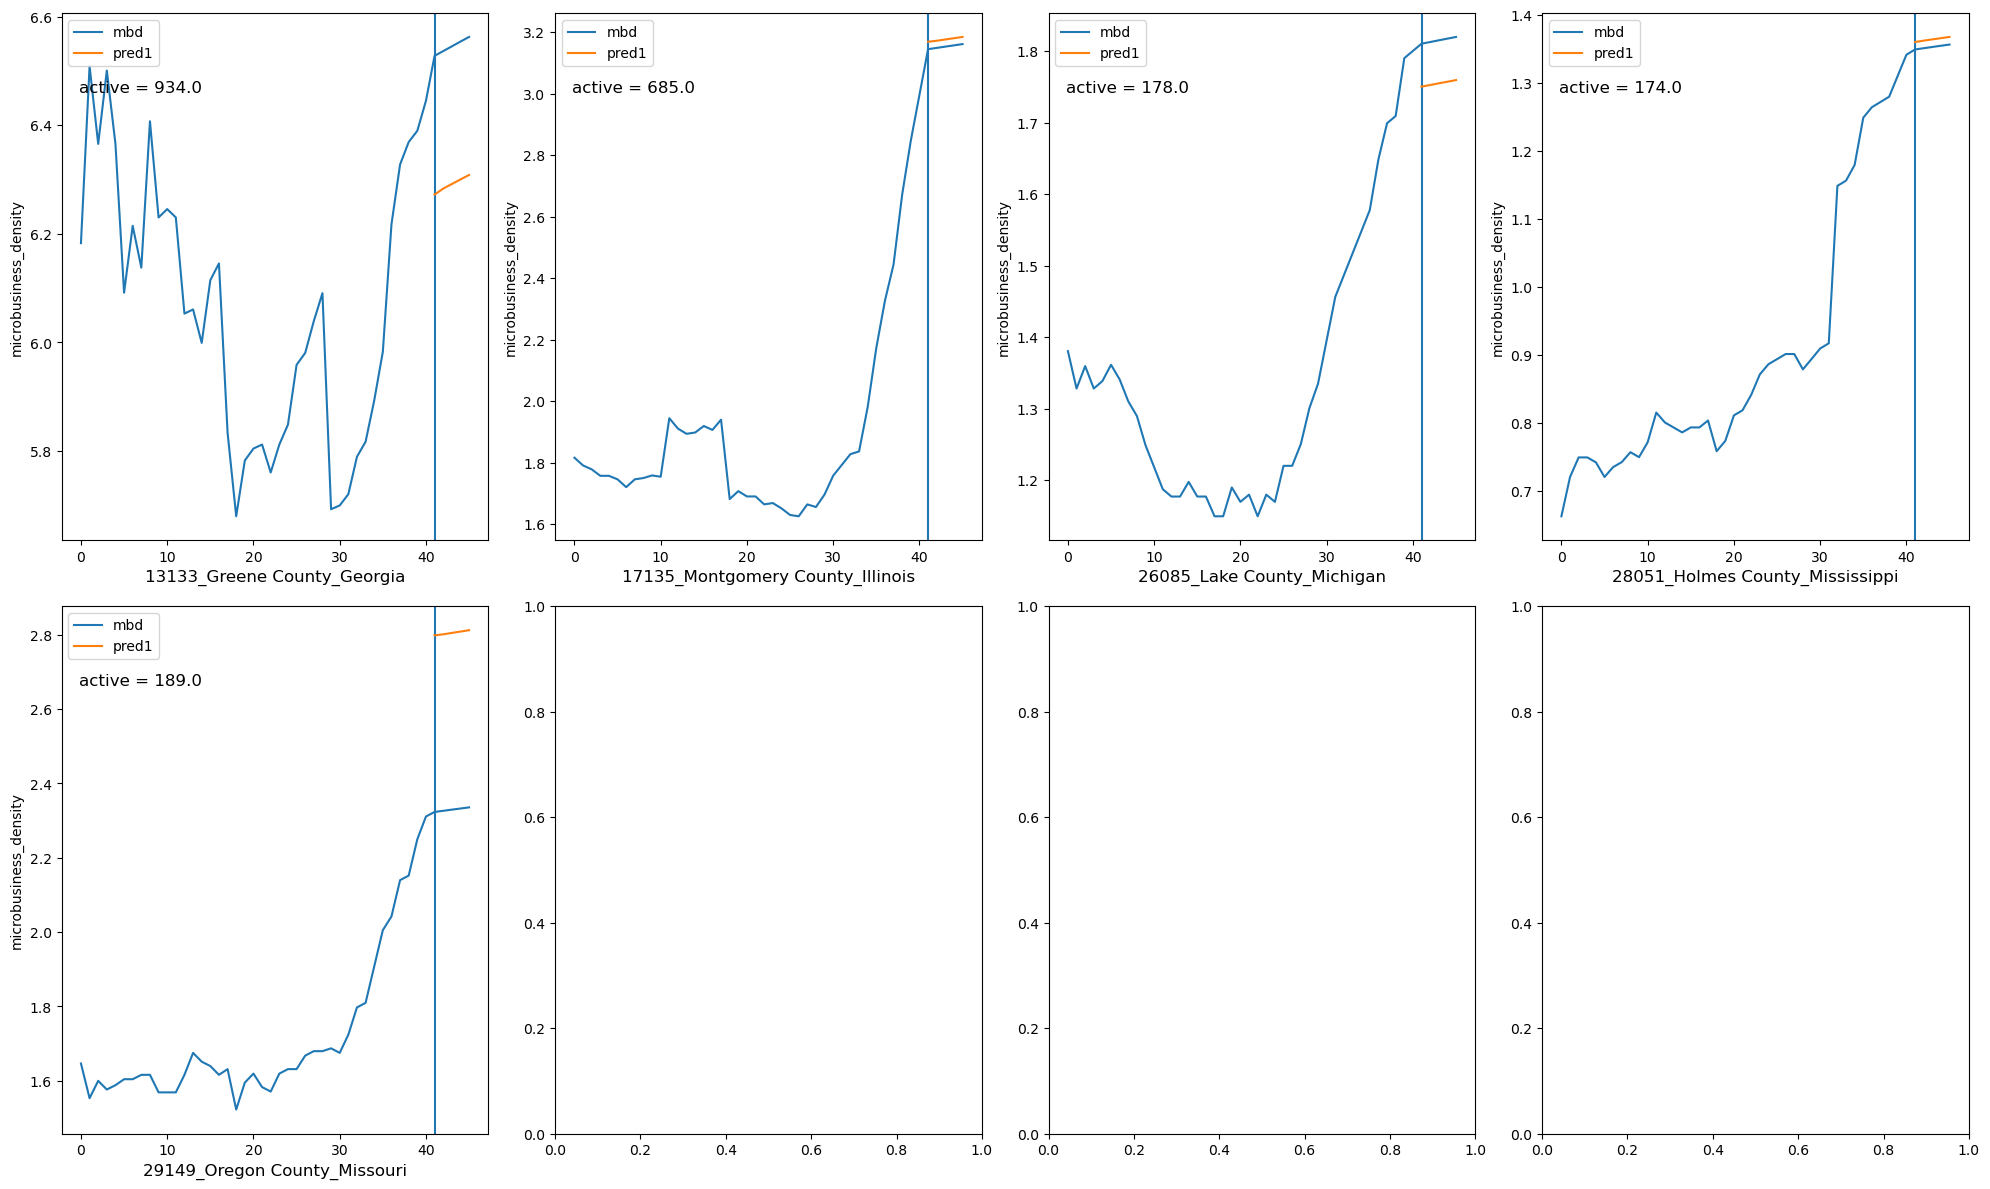

In [129]:
plot_mbd_with_active([13133, 17135, 26085, 28051, 29149])

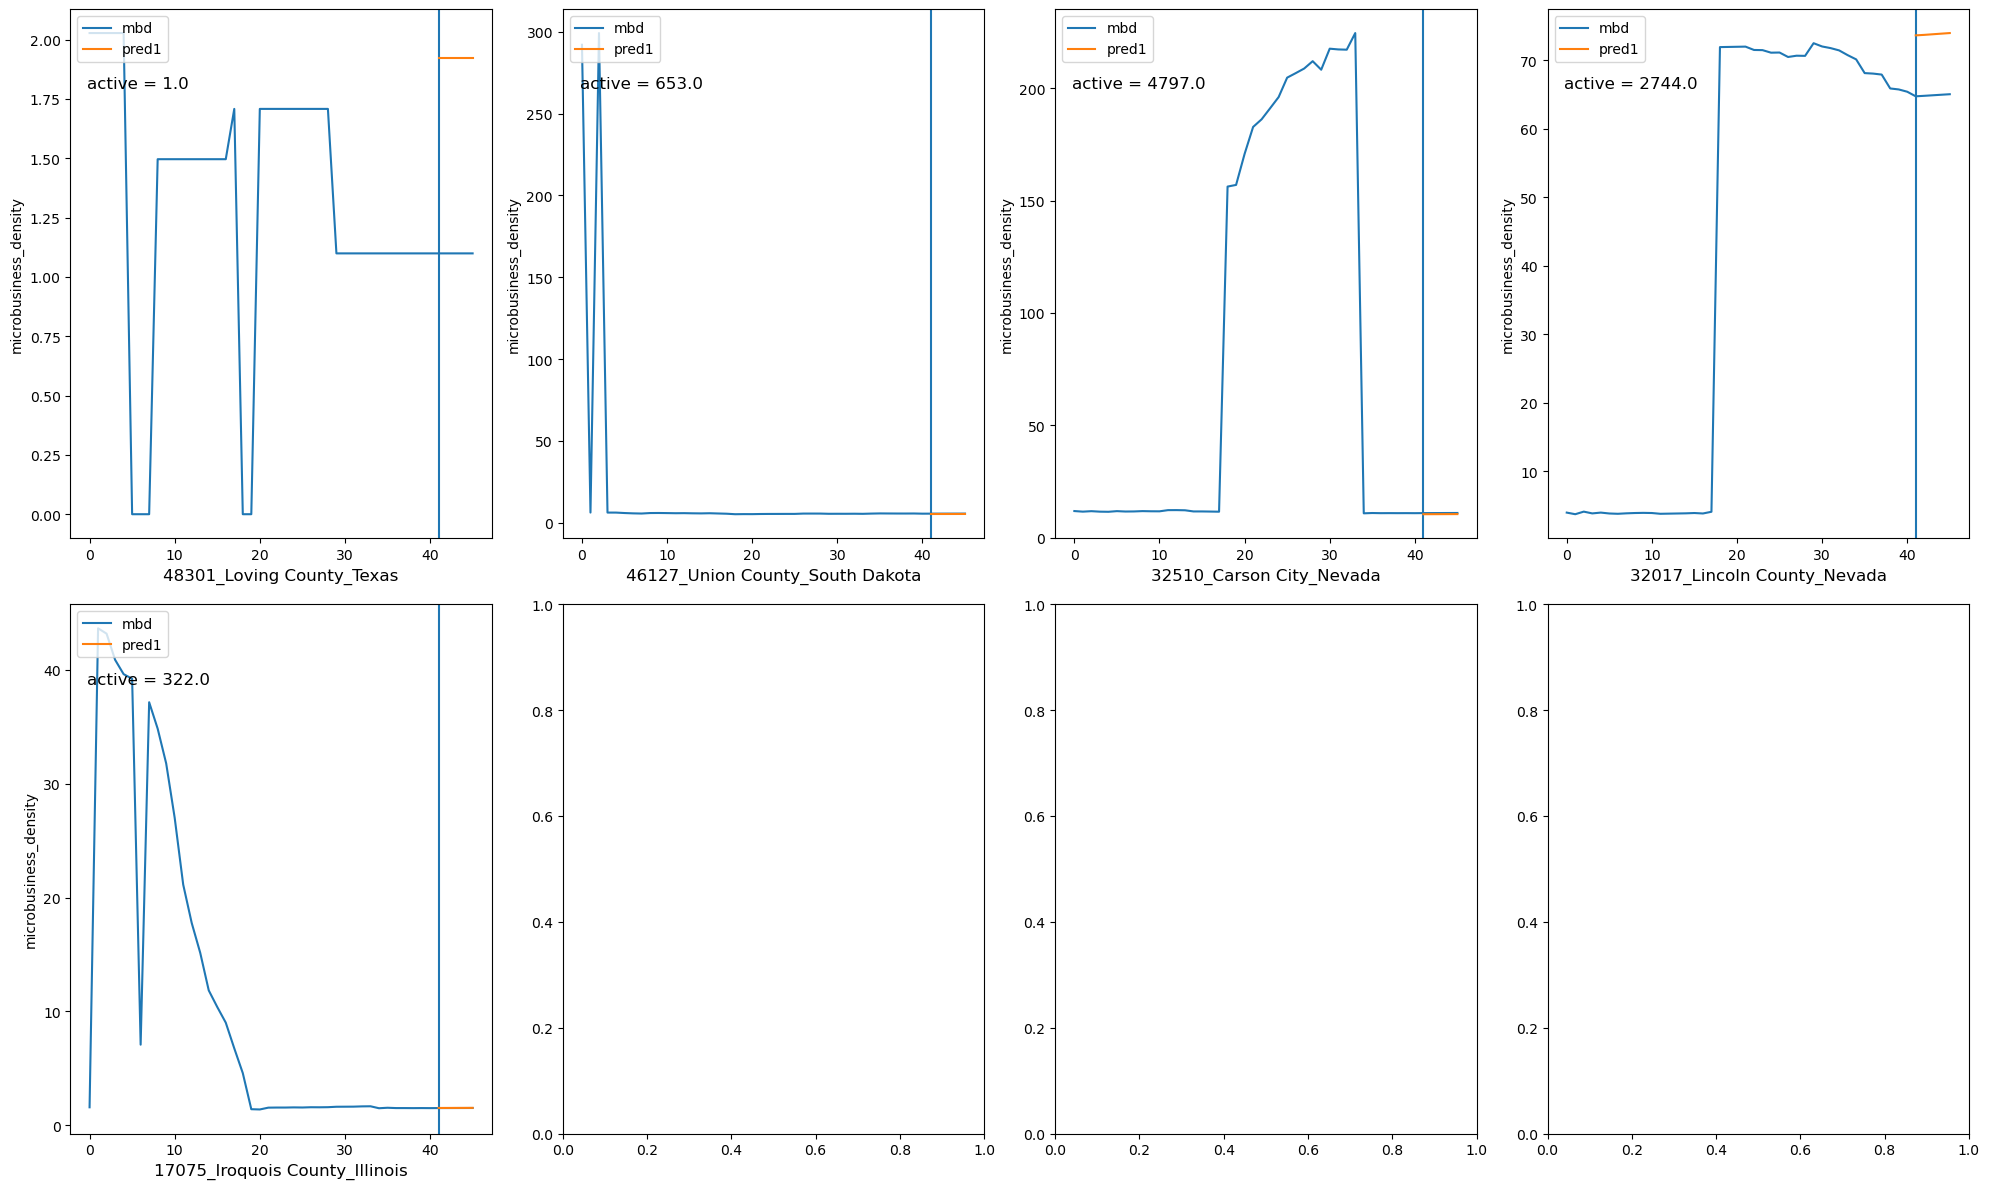

In [116]:
# 急激な上昇のある群
plot_mbd_with_active([48301, 46127, 32510, 32017, 17075])

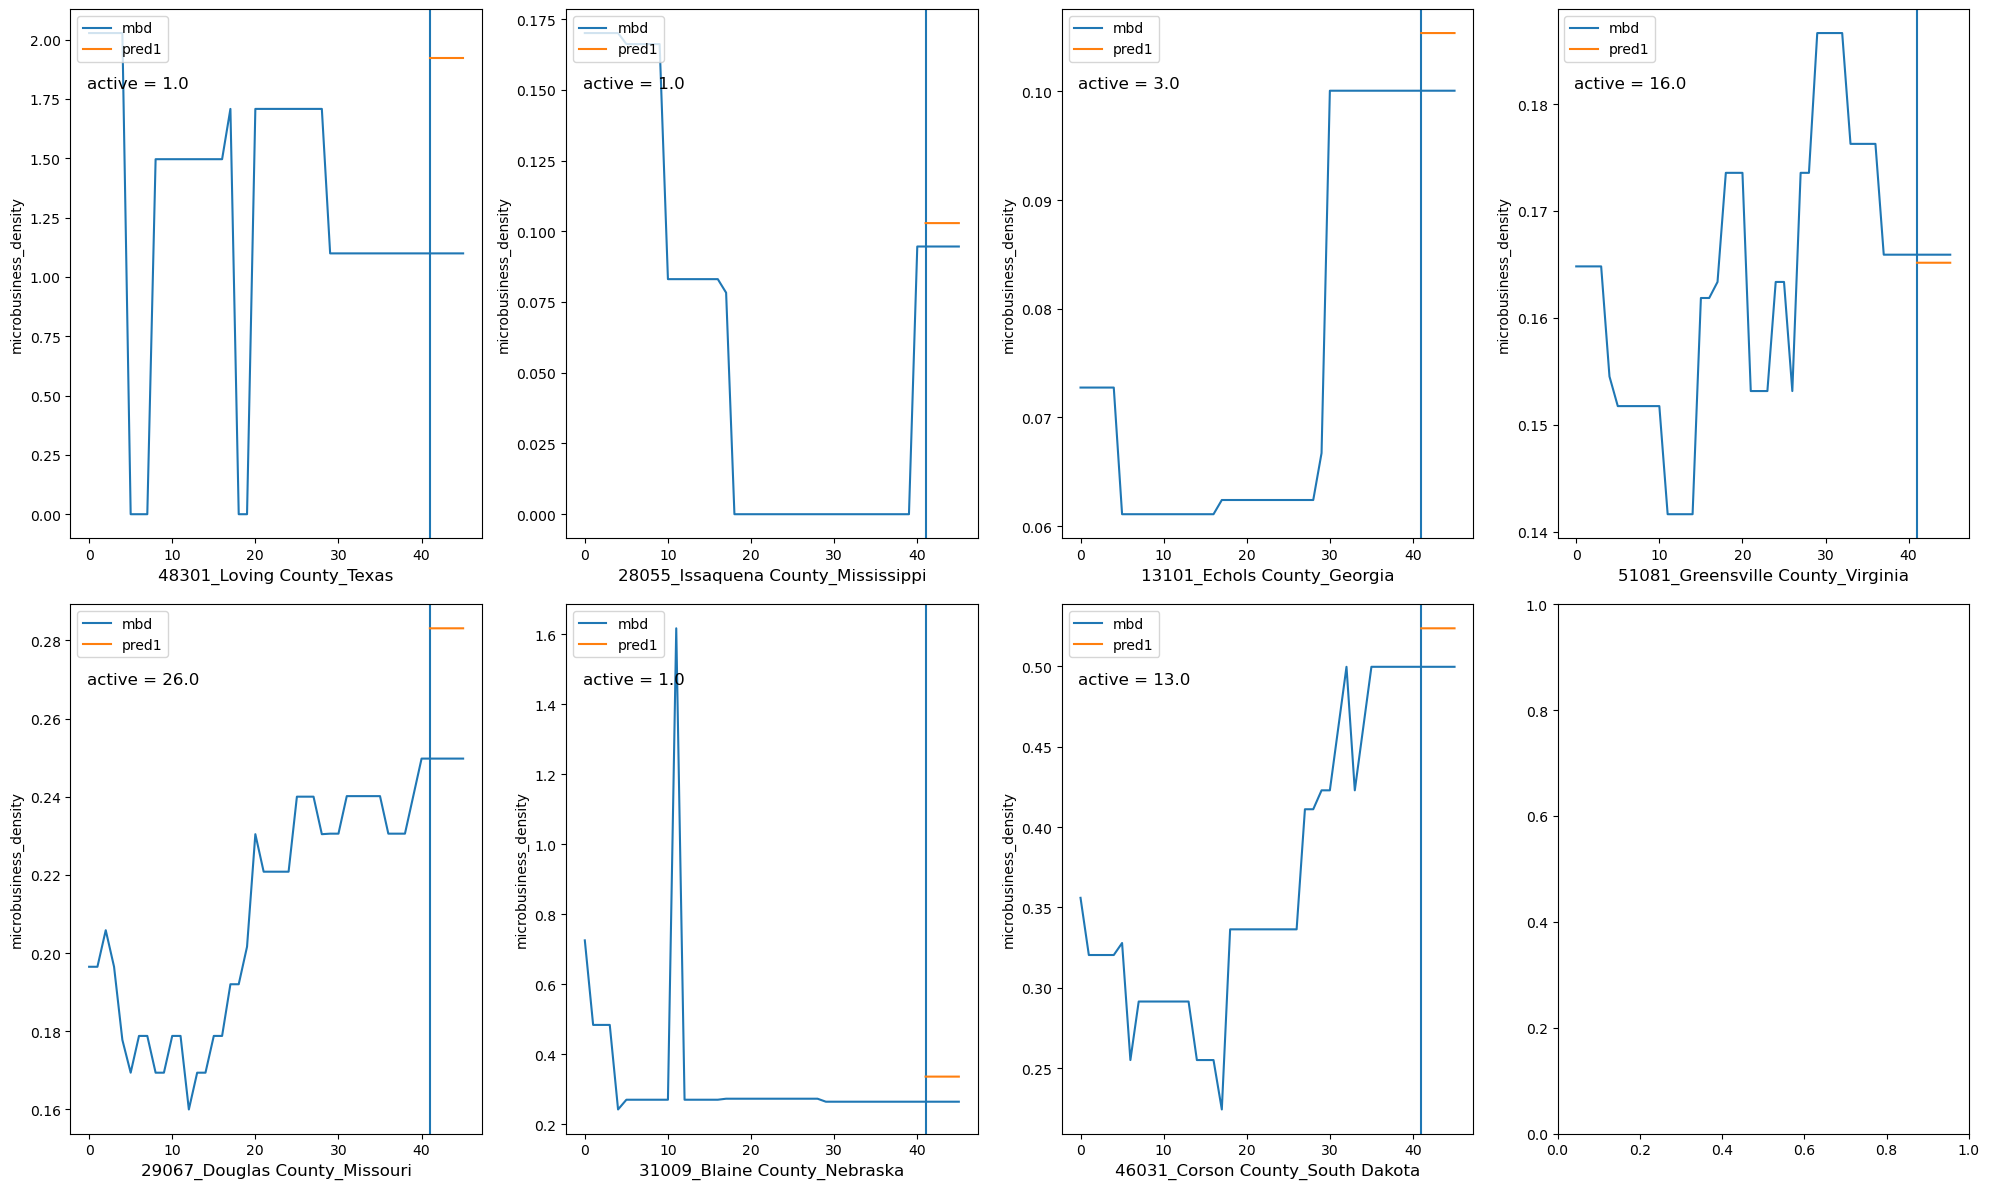

In [117]:
# mbdの値が非常に小さい群
plot_mbd_with_active([48301, 28055, 13101, 51081, 29067, 31009, 46031])

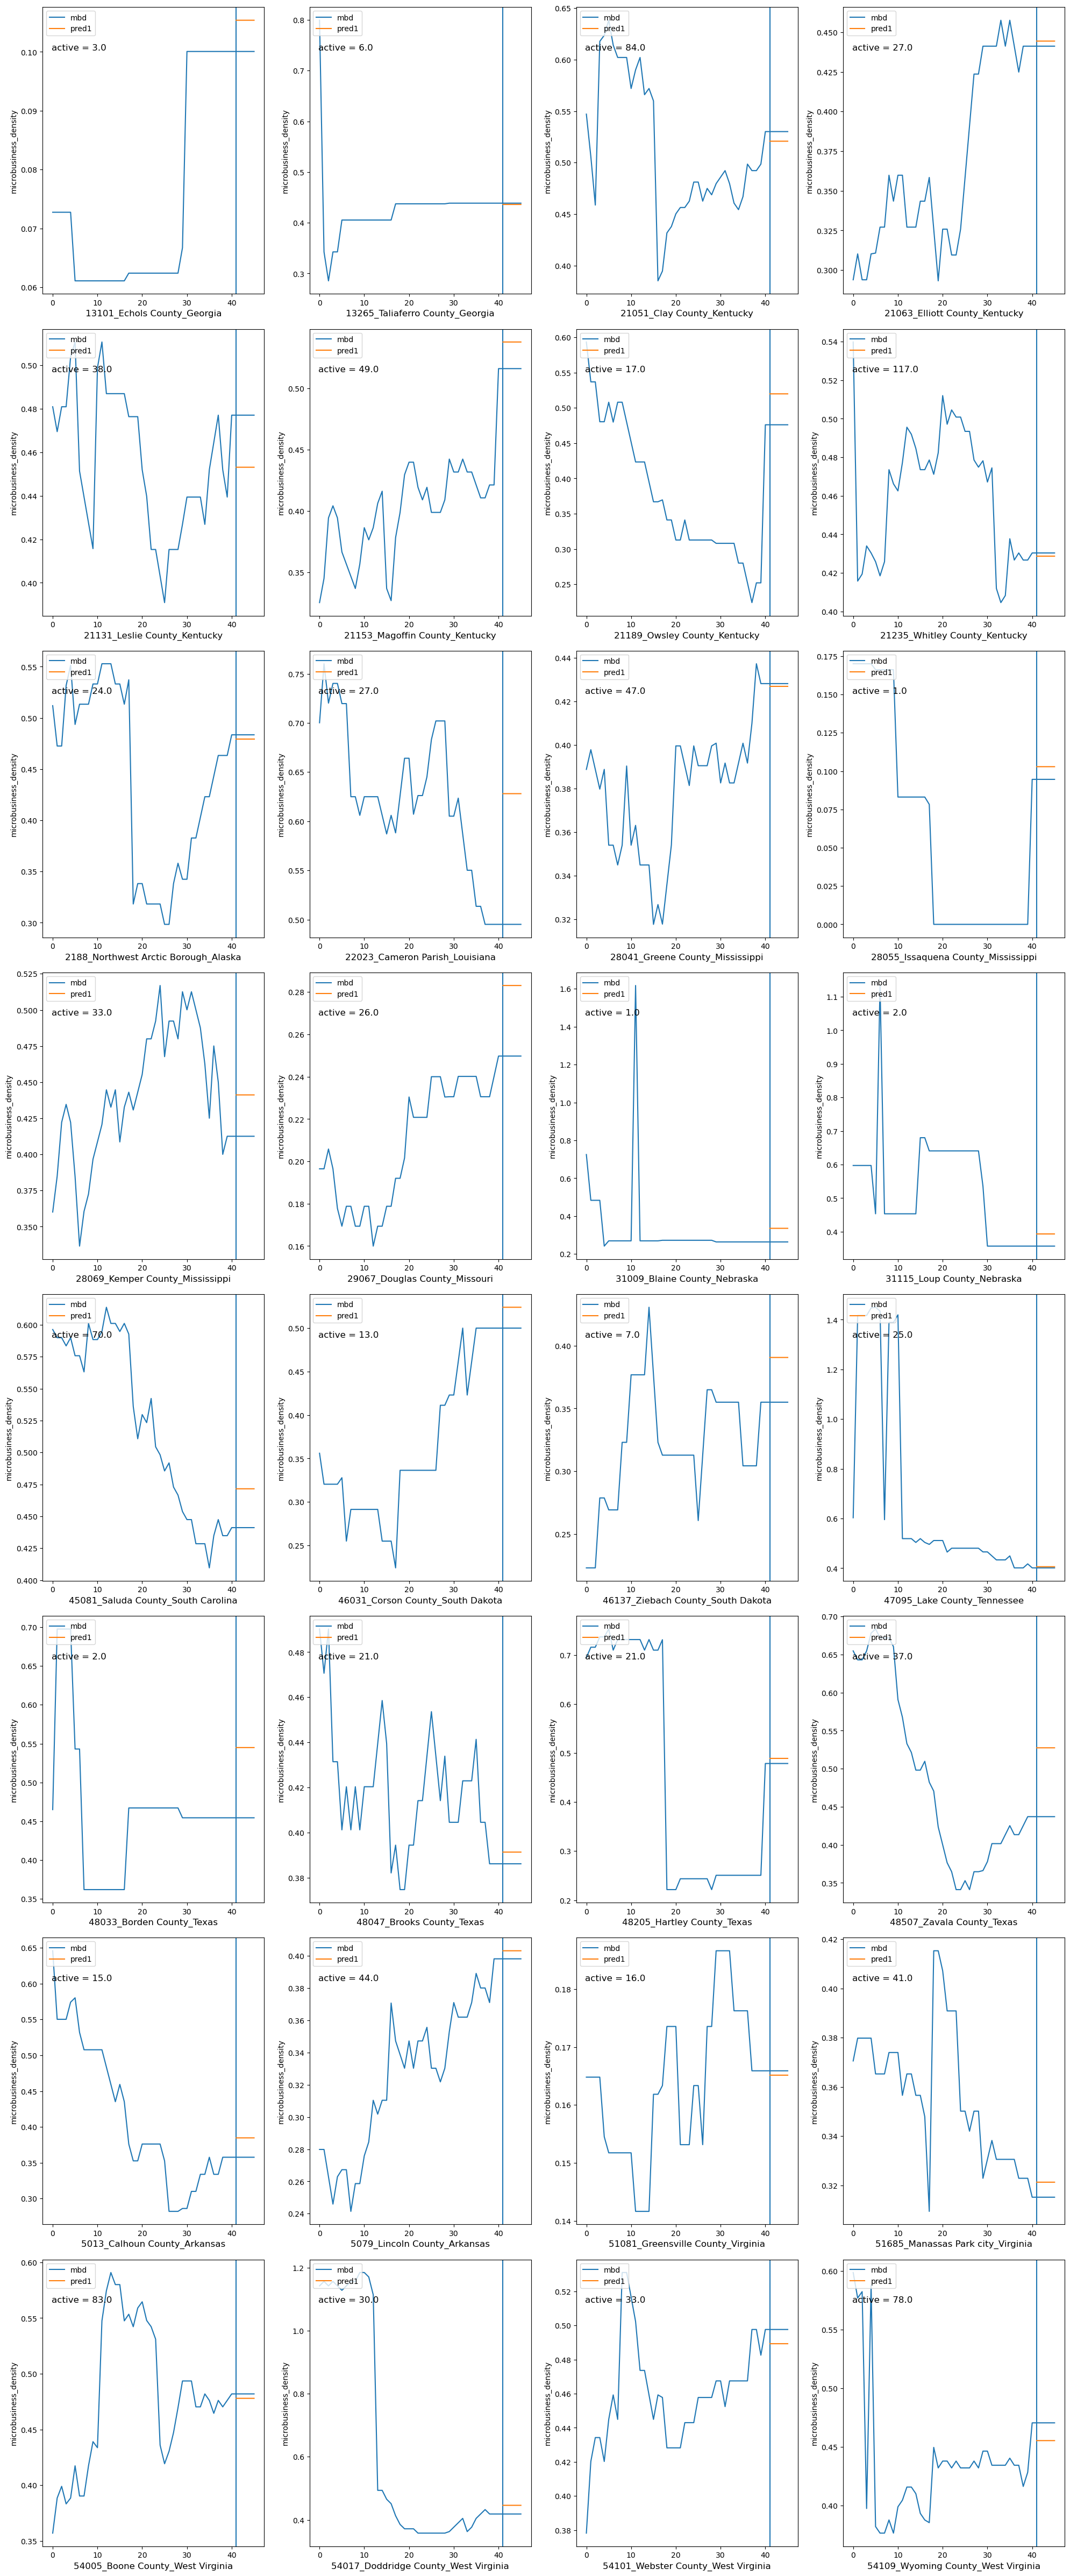

In [118]:
# 2022-10-01でmbdが0.5以下の群
low_mbd = utils.load_pickle('low_mbds_list')
plot_mbd_with_active(low_mbd)

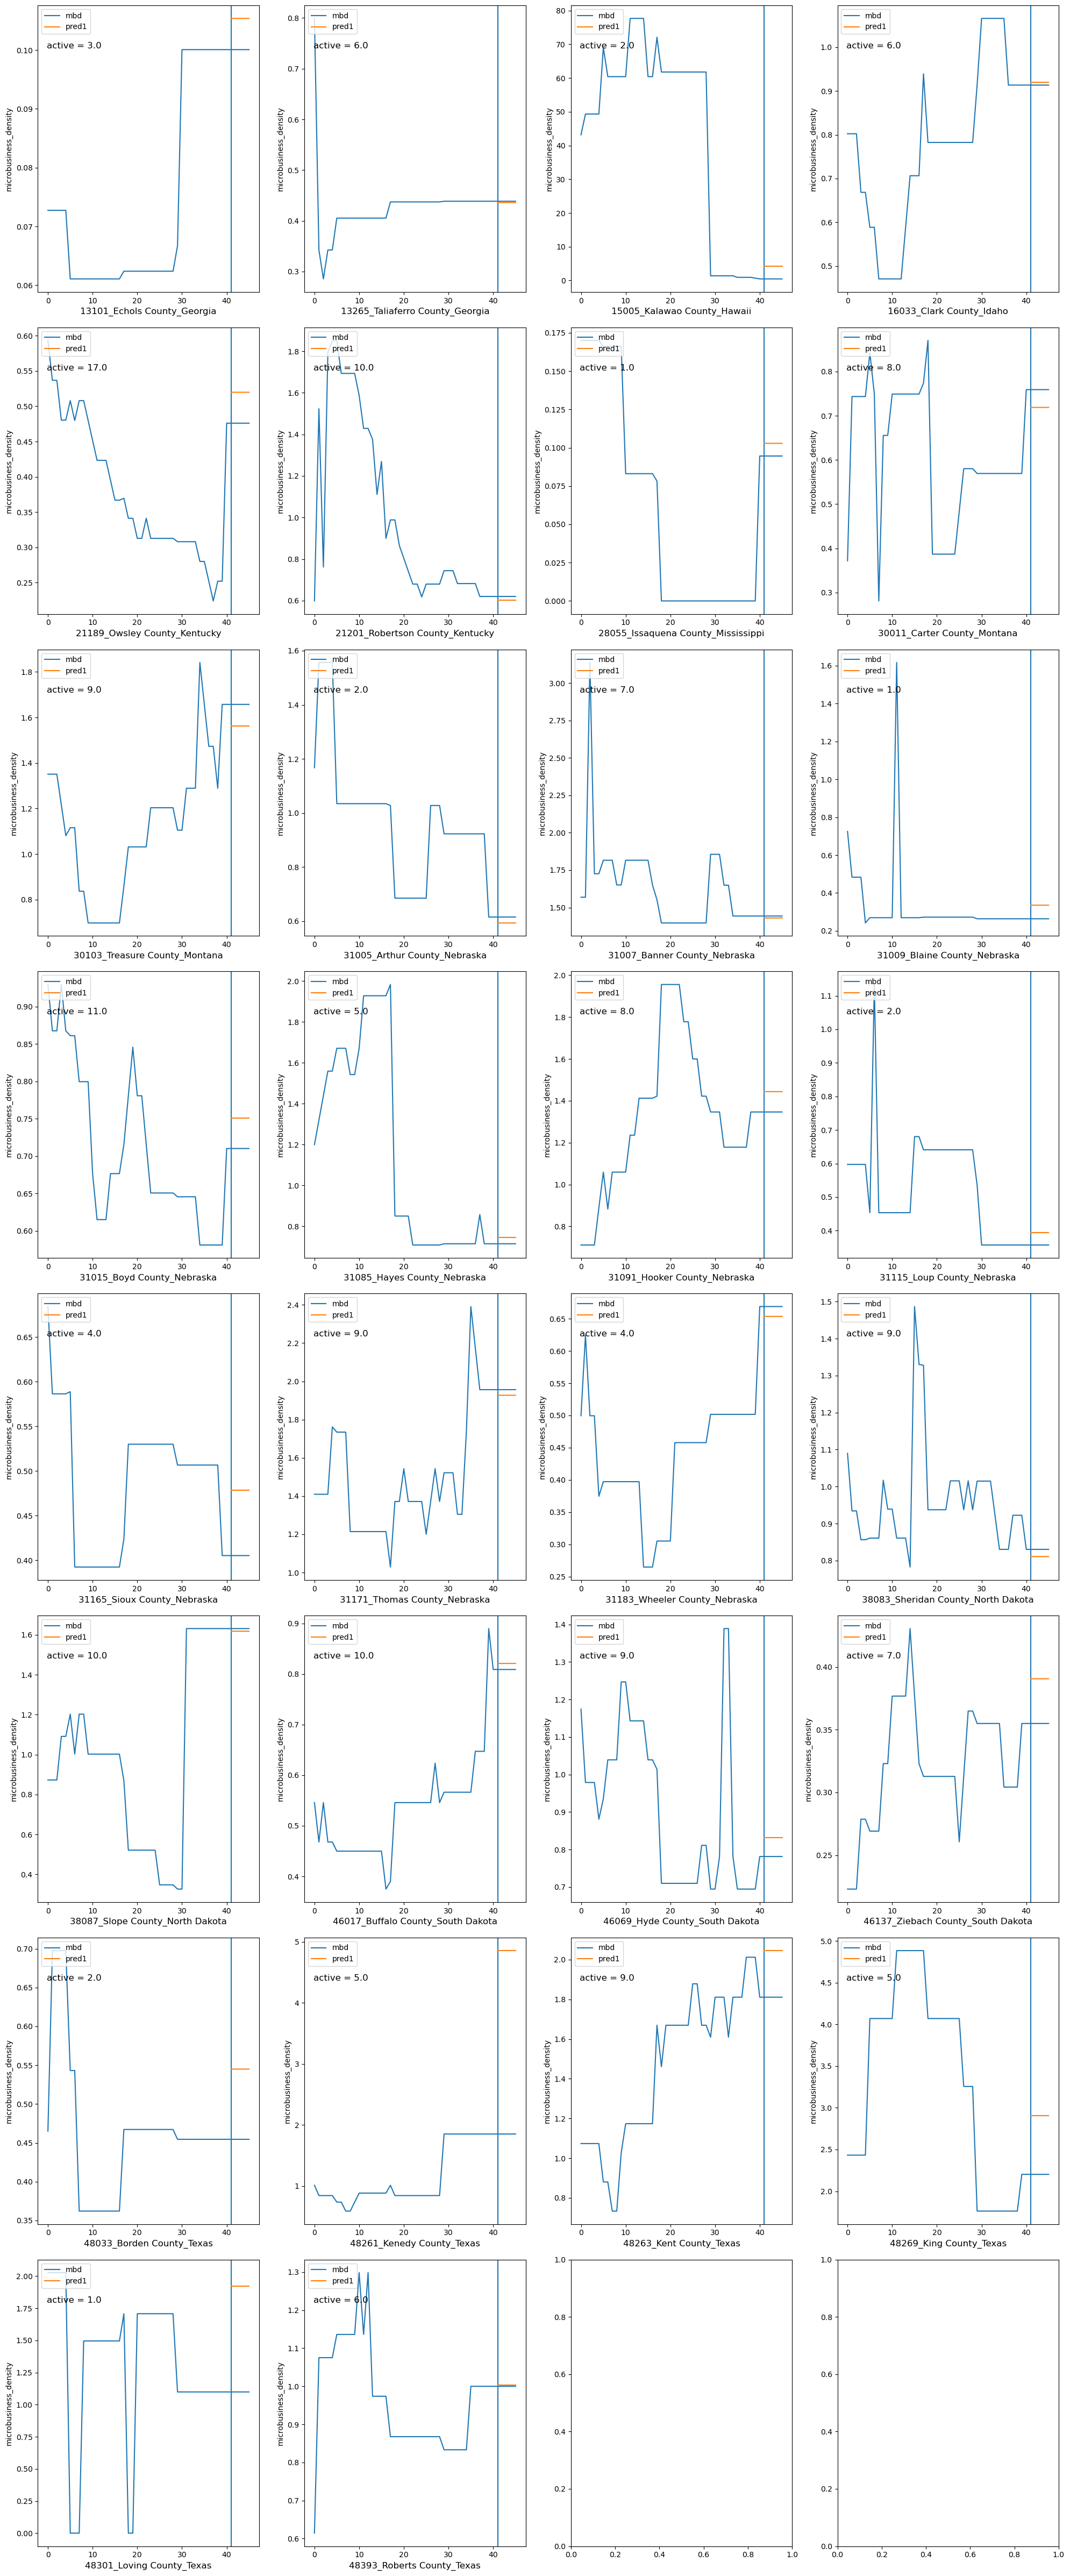

In [119]:
# 2022-10-01でactiveが20以下の群
low_active = utils.load_pickle('low_active_list')
plot_mbd_with_active(low_active)

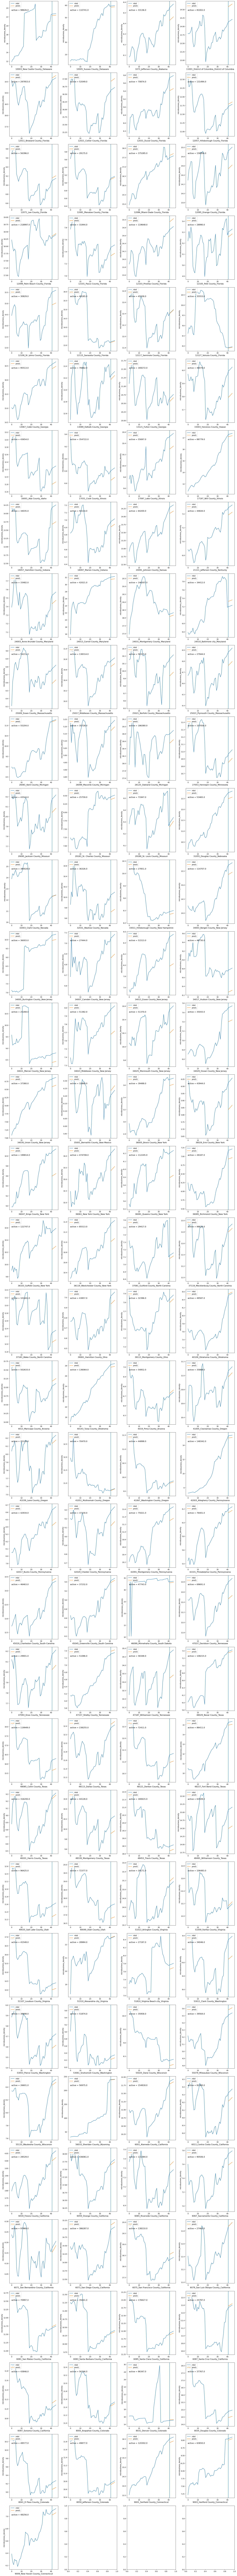

In [120]:
#トレンドの群
trend_active25000 = [10003, 10005,  1073, 11001, 12011, 12021, 12031, 12057, 12071,
       12081, 12086, 12095, 12099, 12101, 12103, 12105, 12109, 12115,
       12117, 12127, 13067, 13089, 13121, 15003, 16001, 17031, 17097,
       17197, 18057, 18097, 20091, 21111, 24003, 24013, 24031, 24510,
       25009, 25017, 25021, 25023, 26081, 26099, 26125, 27053, 29095,
       29183, 29189, 31055, 32003, 32031, 33011, 34003, 34005, 34007,
       34013, 34017, 34021, 34023, 34025, 34029, 34039, 35001, 36005,
       36029, 36047, 36061, 36081, 36085, 36103, 36119, 37081, 37119,
       37183, 39061, 39113, 40109,  4013, 40143,  4019, 41005, 41039,
       41051, 41067, 42003, 42017, 42029, 42091, 42101, 45019, 45045,
       46099, 47037, 47093, 47157, 47187, 48029, 48085, 48113, 48121,
       48157, 48201, 48339, 48453, 48491, 49035, 49049, 51013, 51059,
       51107, 51510, 51810, 53011, 53053, 53061, 55025, 55079, 55133,
       56033,  6001,  6013,  6019,  6059,  6065,  6067,  6071,  6073,
        6075,  6079,  6081,  6083,  6085,  6087,  6097,  8005,  8031,
        8035,  8041,  8059,  9001,  9003,  9009]

plot_mbd_with_active(trend_active25000)